In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
a = 1
eccentricity = 0.2
eps = eccentricity**2/4

In [3]:
O0 = 0.9 * a
dt = 0.01
gamma = 1
N = 100
samples = 300
tmax = 10000
times = np.arange(0,tmax, dt)


In [4]:
oms_ = np.linspace(0,O0,100)[1:]
x0 = O0**2/a**2
xs = oms_**2/a**2
alpha = gamma**2/a**2
tfactor = 8 * eps**2 * (a**2 + gamma**2)/ a / gamma
u = alpha * (xs-x0) + 2 * (1+alpha) * np.log((1-xs)/(1-x0))-np.log(xs/x0)
ts = u/ tfactor

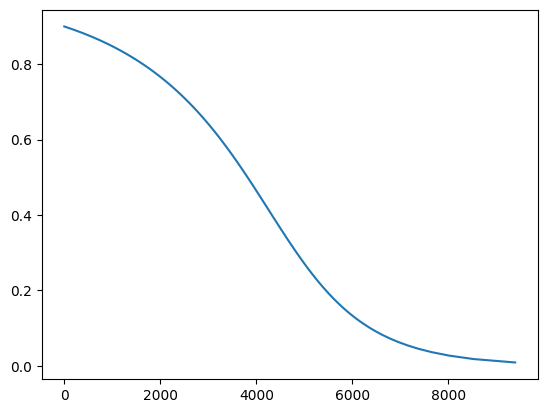

In [5]:
plt.plot(ts, oms_)

In [6]:
oms = [np.ones(samples)* O0 ]
noise = np.random.randn(times.shape[0], samples)
for i in tqdm(range(len(times))):
    om = oms[-1]
    drift = ( -(4 * a**3 * eps**2 * om / gamma) 
             * (a**2 + gamma**2)/(a**4+gamma**2 * om**2) 
             * (a**2-om**2)/(a**2+om**2))
    q = (2 * eps / np.sqrt(N)) * (a**2-om**2)/(a**2+om**2) * np.sqrt(
    gamma * a**2 * (a**2-om**2) / ((a**2-om**2)**2 + gamma**2 * om**2)
    )
    oms.append(om + dt * drift + np.sqrt(dt) * q * noise[i])
oms = np.array(oms[:-1])

  0%|          | 0/1000000 [00:00<?, ?it/s]

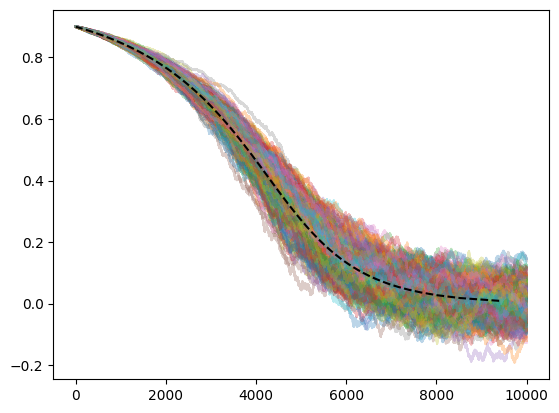

In [7]:
plt.plot(times, oms, alpha=0.3)
plt.plot(ts, oms_, "--", c="k")

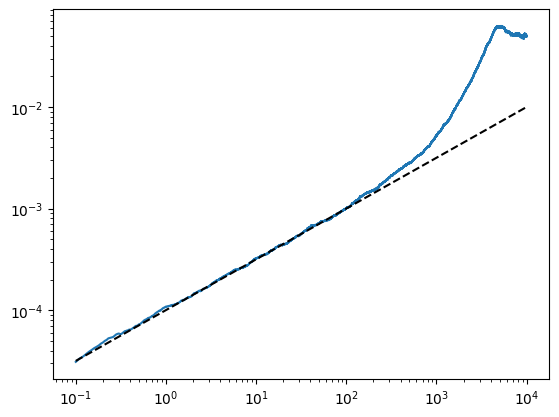

In [8]:
plt.plot(times[10:], oms.std(axis=1)[10:])
plt.plot(times[10:], 0.0001 * times[10:]**0.5, "--", c="k")
plt.xscale("log")
plt.yscale("log")